# Homework 4 - CPTS570 Ricardo Rivero
## Convolutional Neural Network for classifying the Fashion MNIST dataset

In [2]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix
import numpy as np
import random
import os
import time
import copy
import matplotlib.pyplot as plt
from keras._tf_keras.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

In [ ]:
#Load data


In [35]:
#Vanilla CNN from the homework
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

# Define the CNN Model
import torch.nn as nn
import torch.nn.functional as F

class VanillaCNN(nn.Module):
    def __init__(self, num_classes = 10):
        super(VanillaCNN, self).__init__()
        #First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=5, padding=2, stride=2)
        #Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1, stride=2)
        #Third convolutional layer
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1, stride=2)
        #Fourth convolutional layer
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1, stride=2)
        #Pooling layer
        self.AveragePool = nn.AdaptiveAvgPool2d(1)
        #Fully connected layer
        self.fc = nn.Linear(32, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.AveragePool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x
    
# Define device
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("MPS device is available and will be used.")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA device is available and will be used.")
else:
    device = torch.device("cpu")
    print("No GPU found. Using CPU.")


train_loader = DataLoader(
    train_dataset, 
    batch_size=64, 
    shuffle=True, 
    num_workers=2, 
    pin_memory=False  # Set to False for MPS
)
test_loader = DataLoader(
    test_dataset, 
    batch_size=64, 
    shuffle=False, 
    num_workers=2, 
    pin_memory=False
)

# Instantiate the model
model = VanillaCNN(num_classes=10)
model.to(device)


# Define loss criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#Store the loss and accuracy values
train_loss = []
train_accuracy = []

# Number of epochs
num_epochs = 20

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    # Initialize counters at the start of each epoch
    total = 0
    correct = 0
    
    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{num_epochs}]")
    
    for images, labels in loop:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        loop.set_postfix(loss=loss.item())
        
        # Calculate predictions
        _, predicted = torch.max(outputs.data, 1)
        
        # Accumulate total and correct counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # Calculate accuracy
    accuracy = 100 * correct / total
    
    # Calculate average loss
    avg_loss = running_loss / len(train_loader)
    
    # Store loss and accuracy
    train_loss.append(avg_loss)
    train_accuracy.append(accuracy)
    
    # Print epoch summary
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Evaluation Loop
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Evaluating"):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

# Save the model
torch.save(model.state_dict(), 'fashion_mnistVanilla_cnn.pth')
print("fashion_mnistVanilla_cnn.pth")

MPS device is available and will be used.


Epoch [1/20]: 100%|██████████| 938/938 [00:09<00:00, 103.13it/s, loss=0.541]


Epoch [1/20], Average Loss: 0.8064, Accuracy: 69.91%


Epoch [2/20]: 100%|██████████| 938/938 [00:08<00:00, 109.54it/s, loss=0.366]


Epoch [2/20], Average Loss: 0.5067, Accuracy: 81.39%


Epoch [3/20]: 100%|██████████| 938/938 [00:08<00:00, 111.14it/s, loss=0.605]


Epoch [3/20], Average Loss: 0.4396, Accuracy: 83.89%


Epoch [4/20]: 100%|██████████| 938/938 [00:08<00:00, 111.99it/s, loss=0.389]


Epoch [4/20], Average Loss: 0.4030, Accuracy: 85.19%


Epoch [5/20]: 100%|██████████| 938/938 [00:07<00:00, 118.52it/s, loss=0.324]


Epoch [5/20], Average Loss: 0.3763, Accuracy: 86.18%


Epoch [6/20]: 100%|██████████| 938/938 [00:08<00:00, 116.07it/s, loss=0.53]  


Epoch [6/20], Average Loss: 0.3601, Accuracy: 86.78%


Epoch [7/20]: 100%|██████████| 938/938 [00:08<00:00, 114.82it/s, loss=0.249] 


Epoch [7/20], Average Loss: 0.3427, Accuracy: 87.31%


Epoch [8/20]: 100%|██████████| 938/938 [00:08<00:00, 109.75it/s, loss=0.468]


Epoch [8/20], Average Loss: 0.3296, Accuracy: 87.81%


Epoch [9/20]: 100%|██████████| 938/938 [00:08<00:00, 116.03it/s, loss=0.377] 


Epoch [9/20], Average Loss: 0.3186, Accuracy: 88.26%


Epoch [10/20]: 100%|██████████| 938/938 [00:08<00:00, 116.96it/s, loss=0.384]


Epoch [10/20], Average Loss: 0.3087, Accuracy: 88.66%


Epoch [11/20]: 100%|██████████| 938/938 [00:09<00:00, 100.53it/s, loss=0.183] 


Epoch [11/20], Average Loss: 0.2966, Accuracy: 89.19%


Epoch [12/20]: 100%|██████████| 938/938 [00:09<00:00, 100.12it/s, loss=0.546] 


Epoch [12/20], Average Loss: 0.2913, Accuracy: 89.31%


Epoch [13/20]: 100%|██████████| 938/938 [00:08<00:00, 112.28it/s, loss=0.118] 


Epoch [13/20], Average Loss: 0.2822, Accuracy: 89.61%


Epoch [14/20]: 100%|██████████| 938/938 [00:08<00:00, 113.52it/s, loss=0.171] 


Epoch [14/20], Average Loss: 0.2747, Accuracy: 89.85%


Epoch [15/20]: 100%|██████████| 938/938 [00:09<00:00, 102.46it/s, loss=0.25]  


Epoch [15/20], Average Loss: 0.2712, Accuracy: 89.98%


Epoch [16/20]: 100%|██████████| 938/938 [00:09<00:00, 104.05it/s, loss=0.134] 


Epoch [16/20], Average Loss: 0.2647, Accuracy: 90.23%


Epoch [17/20]: 100%|██████████| 938/938 [00:08<00:00, 113.33it/s, loss=0.262] 


Epoch [17/20], Average Loss: 0.2594, Accuracy: 90.48%


Epoch [18/20]: 100%|██████████| 938/938 [00:08<00:00, 106.58it/s, loss=0.0785]


Epoch [18/20], Average Loss: 0.2547, Accuracy: 90.57%


Epoch [19/20]: 100%|██████████| 938/938 [00:08<00:00, 111.05it/s, loss=0.0949]


Epoch [19/20], Average Loss: 0.2504, Accuracy: 90.73%


Epoch [20/20]: 100%|██████████| 938/938 [00:10<00:00, 92.52it/s, loss=0.172]  


Epoch [20/20], Average Loss: 0.2461, Accuracy: 90.80%


Evaluating: 100%|██████████| 157/157 [00:02<00:00, 72.42it/s] 

Test Accuracy: 89.37%
fashion_mnistVanilla_cnn.pth


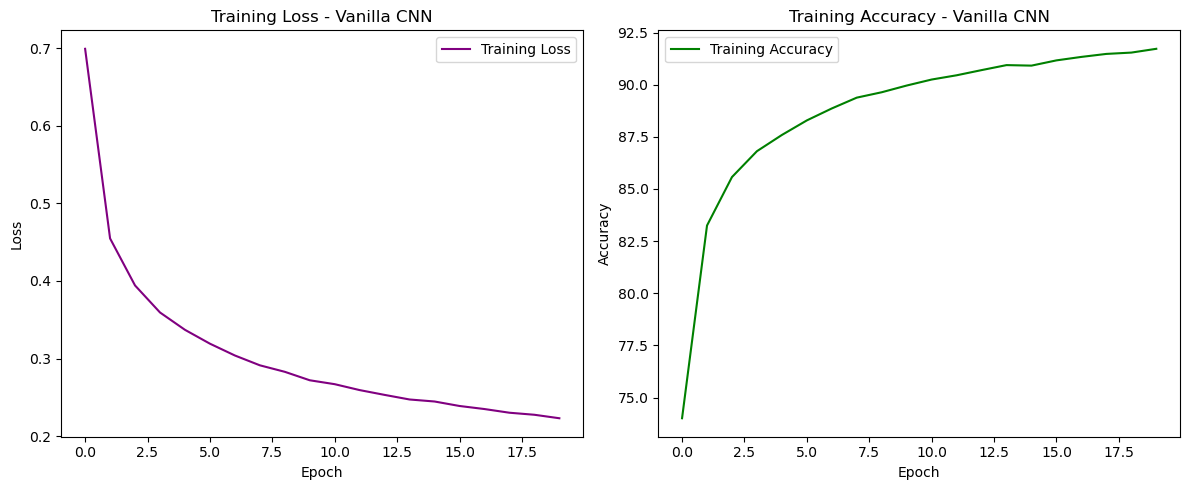

In [24]:
#Plot the training curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_loss, label='Training Loss',  color='purple')
plt.title("Training Loss - Vanilla CNN")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracy, label='Training Accuracy', color='green')
plt.title("Training Accuracy - Vanilla CNN")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('fashion_mnist_cnnVanilla_training_curves.jpeg', dpi = 600)
plt.show()


In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

# Define the CNN Model
import torch.nn as nn
import torch.nn.functional as F

class FashionMNISTCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(FashionMNISTCNN, self).__init__()
        
        # First Convolutional Layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=5, padding=2, stride=2)
        self.bn1 = nn.BatchNorm2d(8)  # BatchNorm after conv1
        
        # Second Convolutional Layer
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1, stride=2)
        self.bn2 = nn.BatchNorm2d(16)  # BatchNorm after conv2
        
        # Third Convolutional Layer
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1, stride=2)
        self.bn3 = nn.BatchNorm2d(32)  # BatchNorm after conv3
        
        # Fourth Convolutional Layer
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1, stride=2)
        self.bn4 = nn.BatchNorm2d(32)  # BatchNorm after conv4
        
        # Adaptive Average Pooling Layer
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        
        # Fully Connected Layer
        self.fc = nn.Linear(32, num_classes)
        
    def forward(self, x):
        # First Conv Layer + BatchNorm + ReLU
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        
        # Second Conv Layer + BatchNorm + ReLU
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        
        # Third Conv Layer + BatchNorm + ReLU
        x = self.conv3(x)
        x = self.bn3(x)
        x = F.relu(x)
        
        # Fourth Conv Layer + BatchNorm + ReLU
        x = self.conv4(x)
        x = self.bn4(x)
        x = F.relu(x)
        
        # Adaptive Average Pooling
        x = self.avg_pool(x)  # Shape: [batch_size, 32, 1, 1]
        
        # Flatten the tensor
        x = x.view(x.size(0), -1)  # Shape: [batch_size, 32]
        
        # Fully Connected Layer
        x = self.fc(x)  # Shape: [batch_size, num_classes]
        
        return x

# Define device
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("MPS device is available and will be used.")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA device is available and will be used.")
else:
    device = torch.device("cpu")
    print("No GPU found. Using CPU.")

# # Define transformations
# train_transform = transforms.Compose([
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
# ])

# test_transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,), (0.5,))
# ])

# Download and create datasets
train_dataset = datasets.FashionMNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=train_transform
)
test_dataset = datasets.FashionMNIST(
    root='./data', 
    train=False, 
    download=True, 
    transform=test_transform
)

# Create DataLoaders
train_loader = DataLoader(
    train_dataset, 
    batch_size=32, 
    shuffle=True, 
    num_workers=2, 
    pin_memory=False  # Set to False for MPS
)
test_loader = DataLoader(
    test_dataset, 
    batch_size=32, 
    shuffle=False, 
    num_workers=2, 
    pin_memory=False
)

# Instantiate the model
model = FashionMNISTCNN(num_classes=10)
model.to(device)


# Define loss criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#Store the loss and accuracy values
train_loss = []
train_accuracy = []

# Number of epochs
num_epochs = 20

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    # Initialize counters at the start of each epoch
    total = 0
    correct = 0
    
    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{num_epochs}]")
    
    for images, labels in loop:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        loop.set_postfix(loss=loss.item())
        
        # Calculate predictions
        _, predicted = torch.max(outputs.data, 1)
        
        # Accumulate total and correct counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # Calculate accuracy
    accuracy = 100 * correct / total
    
    # Calculate average loss
    avg_loss = running_loss / len(train_loader)
    
    # Store loss and accuracy
    train_loss.append(avg_loss)
    train_accuracy.append(accuracy)
    
    # Print epoch summary
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Evaluation Loop
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Evaluating"):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

# Save the model
torch.save(model.state_dict(), 'fashion_mnist_cnn.pth')
print("Model saved to fashion_mnist_cnn.pth")

MPS device is available and will be used.


Epoch [1/20]: 100%|██████████| 1875/1875 [00:17<00:00, 104.51it/s, loss=0.454]


Epoch [1/20], Average Loss: 0.5568, Accuracy: 81.50%


Epoch [2/20]: 100%|██████████| 1875/1875 [00:20<00:00, 92.87it/s, loss=0.421]  


Epoch [2/20], Average Loss: 0.3576, Accuracy: 87.15%


Epoch [3/20]: 100%|██████████| 1875/1875 [00:20<00:00, 90.65it/s, loss=0.424]  


Epoch [3/20], Average Loss: 0.3212, Accuracy: 88.29%


Epoch [4/20]: 100%|██████████| 1875/1875 [00:22<00:00, 83.67it/s, loss=0.437]  


Epoch [4/20], Average Loss: 0.3008, Accuracy: 89.01%


Epoch [5/20]: 100%|██████████| 1875/1875 [00:19<00:00, 95.34it/s, loss=0.191]  


Epoch [5/20], Average Loss: 0.2845, Accuracy: 89.62%


Epoch [6/20]: 100%|██████████| 1875/1875 [00:19<00:00, 98.51it/s, loss=0.3]    


Epoch [6/20], Average Loss: 0.2722, Accuracy: 90.00%


Epoch [7/20]: 100%|██████████| 1875/1875 [00:18<00:00, 98.71it/s, loss=0.171]  


Epoch [7/20], Average Loss: 0.2619, Accuracy: 90.30%


Epoch [8/20]: 100%|██████████| 1875/1875 [00:19<00:00, 95.97it/s, loss=0.431]  


Epoch [8/20], Average Loss: 0.2559, Accuracy: 90.57%


Epoch [9/20]: 100%|██████████| 1875/1875 [00:20<00:00, 92.82it/s, loss=0.245]  


Epoch [9/20], Average Loss: 0.2491, Accuracy: 90.81%


Epoch [10/20]: 100%|██████████| 1875/1875 [00:20<00:00, 92.72it/s, loss=0.124]  


Epoch [10/20], Average Loss: 0.2422, Accuracy: 91.14%


Epoch [11/20]: 100%|██████████| 1875/1875 [00:20<00:00, 91.04it/s, loss=0.21]   


Epoch [11/20], Average Loss: 0.2360, Accuracy: 91.30%


Epoch [12/20]: 100%|██████████| 1875/1875 [00:21<00:00, 86.90it/s, loss=0.537]  


Epoch [12/20], Average Loss: 0.2328, Accuracy: 91.49%


Epoch [13/20]: 100%|██████████| 1875/1875 [00:21<00:00, 89.06it/s, loss=0.291]  


Epoch [13/20], Average Loss: 0.2270, Accuracy: 91.68%


Epoch [14/20]: 100%|██████████| 1875/1875 [00:19<00:00, 94.47it/s, loss=0.256]  


Epoch [14/20], Average Loss: 0.2237, Accuracy: 91.76%


Epoch [15/20]: 100%|██████████| 1875/1875 [00:19<00:00, 93.93it/s, loss=0.304]  


Epoch [15/20], Average Loss: 0.2168, Accuracy: 92.01%


Epoch [16/20]: 100%|██████████| 1875/1875 [00:19<00:00, 96.95it/s, loss=0.328]  


Epoch [16/20], Average Loss: 0.2165, Accuracy: 92.01%


Epoch [17/20]: 100%|██████████| 1875/1875 [00:19<00:00, 94.85it/s, loss=0.198]  


Epoch [17/20], Average Loss: 0.2112, Accuracy: 92.18%


Epoch [18/20]: 100%|██████████| 1875/1875 [00:19<00:00, 94.27it/s, loss=0.224]  


Epoch [18/20], Average Loss: 0.2088, Accuracy: 92.24%


Epoch [19/20]: 100%|██████████| 1875/1875 [00:20<00:00, 91.63it/s, loss=0.138]  


Epoch [19/20], Average Loss: 0.2033, Accuracy: 92.58%


Epoch [20/20]: 100%|██████████| 1875/1875 [00:19<00:00, 94.24it/s, loss=0.0575] 


Epoch [20/20], Average Loss: 0.2029, Accuracy: 92.44%


Evaluating: 100%|██████████| 313/313 [00:02<00:00, 127.25it/s]

Test Accuracy: 90.72%
Model saved to fashion_mnist_cnn.pth


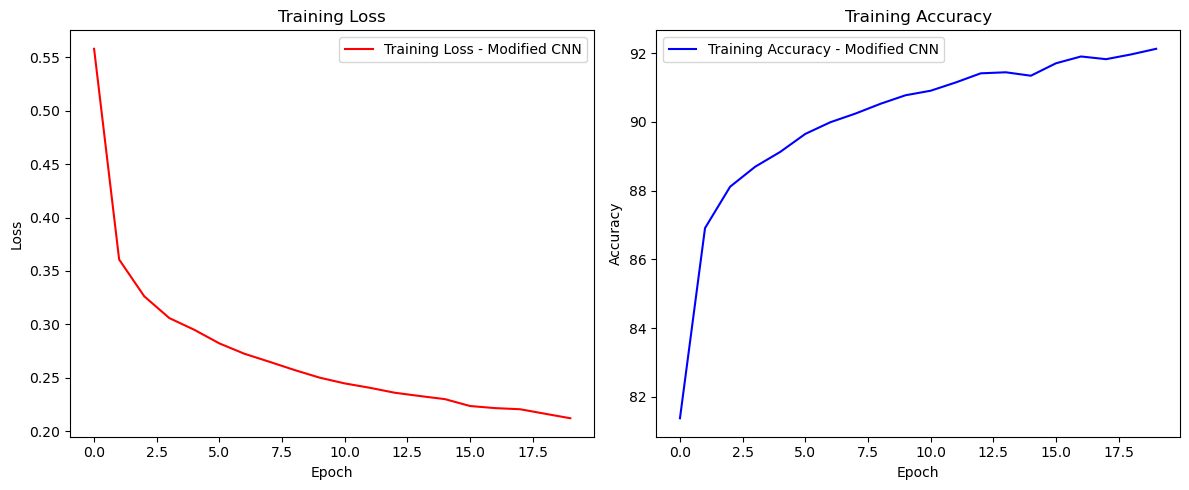

In [28]:
#Plot the training curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_loss, label='Training Loss - Modified CNN',  color='red')
plt.title("Training Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracy, label='Training Accuracy - Modified CNN', color='blue')
plt.title("Training Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('fashion_mnist_cnn_training_curves.jpeg', dpi = 600)
plt.show()
